In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import os
from pathlib import Path


from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 112.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43547,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 112.00 GiB
Comm: tcp://127.0.0.1:35537,Total threads: 4
Dashboard: /proxy/33801/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:43411,


In [15]:
i = "full-20"
[str(j) for j in (Path("/g/data/nm03/ab8992/outputs") / i).glob("output*/ocean_stats.nc")]

['/g/data/nm03/ab8992/outputs/full-20/output014/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output002/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output015/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output001/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output012/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output005/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output013/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output011/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output008/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output017/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output010/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output000/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output003/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output004/ocean_stats.nc',
 '/g/data/nm03/ab8992/outputs/full-20/output016/ocean_stats.nc',
 '/g/data/nm03/ab8992/out

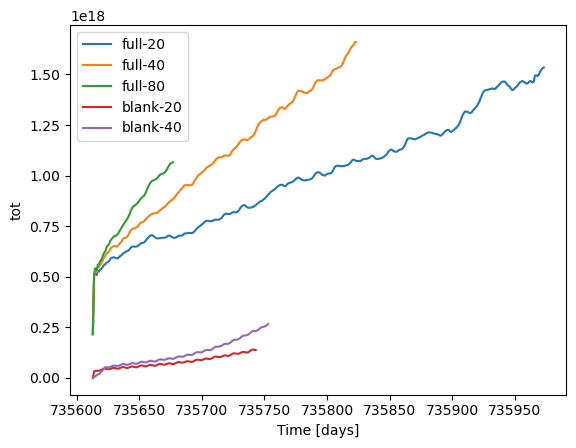

In [3]:
stats = {}
expts = ["full-20","full-40","full-80","blank-20","blank-40"]
for i in expts:
    try:
        temp = xr.open_mfdataset(
            [str(j) for j in (Path("/g/data/nm03/ab8992/outputs") / i).glob("output*/ocean_stats.nc")],decode_times = False
        )

        stats[i]  = xr.Dataset(
            {
                "KE": temp.KE.sum("Layer"),
                "PE": temp.APE.sum("Interface"),
                "tot": temp.KE.sum("Layer") + temp.APE.sum("Interface")
            }
        )
        # Modify Time coordinate of stats[i]


        # stats[i].coords["Time"][:].values -= 735600
    except Exception as e:
        print(i)
        print(e)
        pass
for i in expts:
    stats[i].tot.plot(label=i)
    plt.legend()

In [10]:
200/15

13.333333333333334

In [7]:
i = "blank-20"
blank_20 = xr.open_mfdataset(
            [str(j) for j in (Path("/g/data/nm03/ab8992/outputs") / i).glob("output*/ocean_stats.nc")],decode_times = False
        )

blank_20

<xarray.Dataset>
Dimensions:        (Layer: 100, Interface: 101, Time: 156)
Coordinates:
  * Layer          (Layer) float64 2.704 8.126 13.58 ... 5.339e+03 5.696e+03
  * Interface      (Interface) float64 0.0 5.408 10.84 ... 5.391e+03 6e+03
  * Time           (Time) float64 7.356e+05 7.356e+05 ... 7.357e+05 7.357e+05
Data variables: (12/17)
    Ntrunc         (Time) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    En             (Time) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    APE            (Time, Interface) float64 dask.array<chunksize=(6, 101), meta=np.ndarray>
    KE             (Time, Layer) float64 dask.array<chunksize=(6, 100), meta=np.ndarray>
    H0             (Time, Interface) float64 dask.array<chunksize=(6, 101), meta=np.ndarray>
    Mass_lay       (Time, Layer) float64 dask.array<chunksize=(6, 100), meta=np.ndarray>
    ...             ...
    Salt           (Time) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    Salt_chg       (Time) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    Salt_anom      (Time) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    Heat           (Time) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    Heat_chg       (Time) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    Heat_anom      (Time) float64 dask.array<chunksize=(6,), meta=np.ndarray>
Attributes:
    filename:  ./ocean.stats.nc

In [9]:
len([str(j) for j in (Path("/g/data/nm03/ab8992/outputs") / i).glob("output*/ocean_stats.nc")])

26

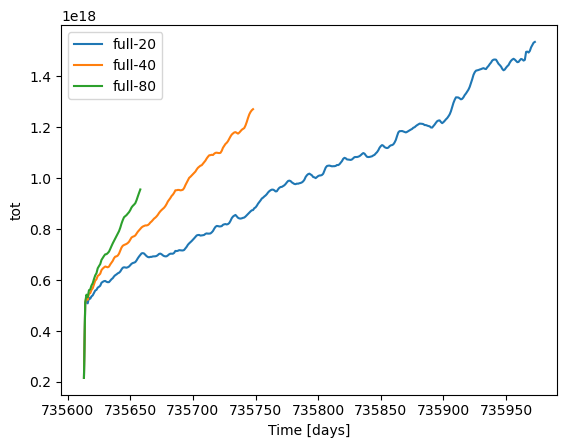

In [3]:


plt.legend()
# stats["full-20"].KE.plot()
# stats["full-20"].PE.plot()

0.3.0


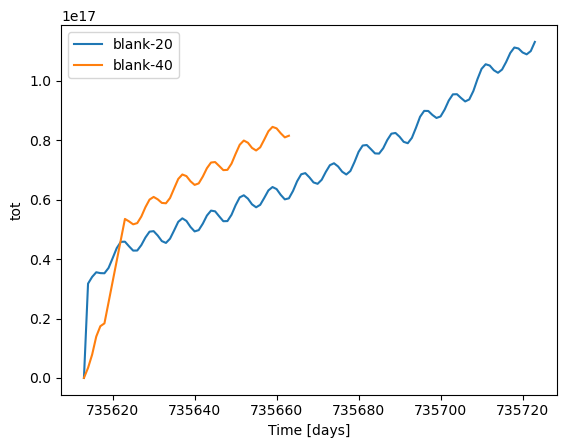

In [2]:
stats = {}
expts = ["blank-20","blank-40"]
for i in expts:
    try:
        temp = xr.open_mfdataset(
            [str(j) for j in (Path("/g/data/nm03/ab8992/outputs") / i).glob("output*/ocean_stats.nc")],decode_times = False
        )

        stats[i]  = xr.Dataset(
            {
                "KE": temp.KE.sum("Layer"),
                "PE": temp.APE.sum("Interface"),
                "tot": temp.KE.sum("Layer") + temp.APE.sum("Interface")
            }
        )
        # Modify Time coordinate of stats[i]


        # stats[i].coords["Time"][:].values -= 735600
    except Exception as e:
        print(i)
        print(e)
        pass
for i in expts:
    stats[i].tot.plot(label=i)

plt.legend()

## Spinup in our region only


In [5]:
expts = ["full-20","full-40","full-80"]
expts = ["blank-40"]


for i in expts:
    u = xr.open_mfdataset(
        f"/g/data/nm03/ab8992/outputs/{i}/output*/u/*",decode_times = False,parallel=True
    ).fillna(0)
    v = xr.open_mfdataset(
        f"/g/data/nm03/ab8992/outputs/{i}/output*/v/*",decode_times = False,parallel=True
    ).fillna(0)
    print("Calculate ke")
    ke = (u.u**2 * v.v**2).integrate("xb").integrate("yb").integrate("zl")
    ke.to_netcdf(f"/g/data/nm03/ab8992/postprocessed/{i}/ke_timeseries.nc")



Calculate ke


2023-12-13 12:00:45,286 - distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:38121
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/tornado/iostream.py", line 861, in _read_to_buffer
    bytes_read = self.read_from_fd(buf)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/tornado/iostream.py", line 1116, in read_from_fd
    return self.socket.recv_into(buf, len(buf))
ConnectionResetError: [Errno 104] Connection reset by peer

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/worker.py", line 2060, in gather_dep
    response = await get_data_from_worker(
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/worker.py", line 2

In [4]:
ke.to_netcdf(f"/g/data/nm03/ab8992/postprocessed/{i}/ke_timeseries.nc")

In [ ]:
ke.to_netcdf(f"/g/data/nm03/ab8992/postprocessed/ke_timeseries.nc")